In [35]:
# Importing the library

import pandas as pd

In [36]:
# Read the csv file with semicolon as dataframe

cardio = pd.read_csv("cardio_train.csv", sep = ";")

In [37]:
# Checking the information for the dataframe

cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [38]:
# Visualizing the top five rows of the dataframe

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
# Handling categorical data type

cardio[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = cardio[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('category')

In [40]:
# Getting the X and y values from the dataframe

X = cardio.iloc[:, :-1]
y = cardio.iloc[:, 12]

In [41]:
# Importing the test and train split library

from sklearn.model_selection import train_test_split

In [42]:
# Splitting the dataset into test and train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
# Scaling the variables using standard scaler object

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
# Fitting the logistic regression on the test and training set

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
# Getting the predictions for the X_test

y_pred = classifier.predict(X_test)

In [46]:
# Calculating the accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[4612, 2457],
       [2750, 4181]])

In [47]:
# Calculating the area under the curve

from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.6278289713006604

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

l = [1,2,3,4,5,6,7,8,9,10]
auc = []

for k in l:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    auc.append(metrics.roc_auc_score(y_test, y_pred))  

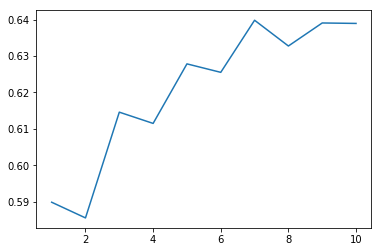

In [32]:
figure = sns.lineplot(x = l, y = auc)